### Shubham Yadav
### 22BAI1427

### ID3

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
df=pd.read_csv("drug200.csv")

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [6]:
X=df.drop(['Drug'], axis=1) 
y=df['Drug']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=56)

In [8]:
X_train.shape, X_test.shape

((140, 5), (60, 5))

In [9]:
X_train.head()

,Age,Sex,BP,Cholesterol,Na_to_K
130,70,F,NORMAL,HIGH,20.489
3,28,F,NORMAL,HIGH,7.798
64,60,F,HIGH,HIGH,13.303
182,20,F,LOW,NORMAL,11.686
128,47,M,LOW,NORMAL,33.542


In [10]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
X_test['Sex'] = label_encoder.fit_transform(X_test['Sex'])
X_test['BP'] = label_encoder.fit_transform(X_test['BP'])
X_test['Cholesterol'] = label_encoder.fit_transform(X_test['Cholesterol'])

In [11]:
X_test.head()

,Age,Sex,BP,Cholesterol,Na_to_K
71,28,0,2,0,19.675
42,50,1,2,1,15.790
82,32,0,1,0,9.712
167,57,0,2,0,14.216
186,70,1,0,0,9.849


In [12]:
X_train['Sex'] = label_encoder.fit_transform(X_train['Sex'])
X_train['BP'] = label_encoder.fit_transform(X_train['BP'])
X_train['Cholesterol'] = label_encoder.fit_transform(X_train['Cholesterol'])

In [13]:
from sklearn.tree import DecisionTreeClassifier

dtree_entropy = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
dtree_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [14]:
y_pred = dtree_entropy.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with criterion entropy: 0.8667


In [16]:
y_pred_train = dtree_entropy.predict(X_train)

In [17]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
print('Test set accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Training-set accuracy score: 0.9357
Test set accuracy score: 0.8667


In [19]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 6  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0  0  7  0]
 [ 0  0  0 15  1]
 [ 0  0  0  0 27]]

Classification Report:
               precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         4
       drugC       0.00      0.00      0.00         7
       drugX       0.68      0.94      0.79        16
       drugY       0.96      1.00      0.98        27

    accuracy                           0.87        60
   macro avg       0.73      0.79      0.75        60
weighted avg       0.78      0.87      0.82        60



C:\Users\junio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\junio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\junio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

[Text(0.625, 0.875, 'x[4] <= 14.588\nentropy = 1.955\nsamples = 140\nvalue = [17, 12, 9, 38, 64]'),
 Text(0.5, 0.625, 'x[2] <= 0.5\nentropy = 1.768\nsamples = 76\nvalue = [17, 12, 9, 38, 0]'),
 Text(0.25, 0.375, 'x[0] <= 50.5\nentropy = 0.978\nsamples = 29\nvalue = [17, 12, 0, 0, 0]'),
 Text(0.125, 0.125, 'entropy = 0.0\nsamples = 17\nvalue = [17, 0, 0, 0, 0]'),
 Text(0.375, 0.125, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12, 0, 0, 0]'),
 Text(0.75, 0.375, 'x[3] <= 0.5\nentropy = 0.705\nsamples = 47\nvalue = [0, 0, 9, 38, 0]'),
 Text(0.625, 0.125, 'entropy = 0.985\nsamples = 21\nvalue = [0, 0, 9, 12, 0]'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 26\nvalue = [0, 0, 0, 26, 0]'),
 Text(0.75, 0.625, 'entropy = 0.0\nsamples = 64\nvalue = [0, 0, 0, 0, 64]')]

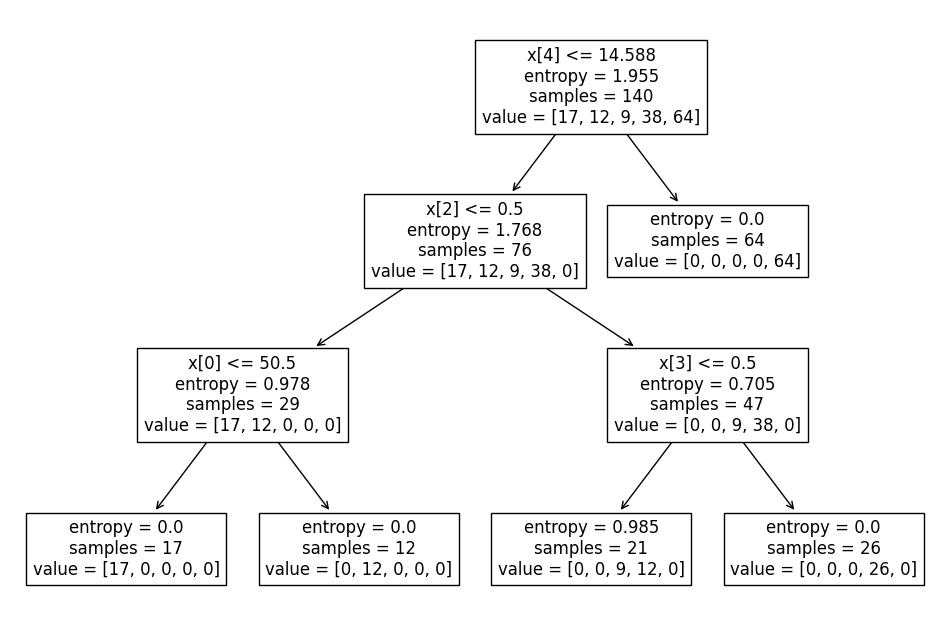

In [20]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(dtree_entropy.fit(X_train, y_train))

### C4.5

In [21]:
X=df.drop(['Drug'], axis=1) 
y=df['Drug']

In [22]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
X['Sex'] = label_encoder.fit_transform(X['Sex'])
X['BP'] = label_encoder.fit_transform(X['BP'])
X['Cholesterol'] = label_encoder.fit_transform(X['Cholesterol'])


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_encoded = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
k=3
best_features = SelectKBest(score_func=chi2, k=k)
X_train_new = best_features.fit_transform(X_train, y_train)
X_test_new = best_features.transform(X_test)

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=3)
clf.fit(X_train_new, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [29]:
y_pred = clf.predict(X_test_new)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy score: {0:0.4f}'.format(accuracy))

Model accuracy score: 0.8750


In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

from sklearn.metrics import classification_report
print("Classification Report\n")
print(classification_report(y_test, y_pred))

Confusion matrix

 [[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 15]]
Classification Report

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       0.00      0.00      0.00         5
       drugX       0.69      1.00      0.81        11
       drugY       1.00      1.00      1.00        15

    accuracy                           0.88        40
   macro avg       0.74      0.80      0.76        40
weighted avg       0.79      0.88      0.82        40



C:\Users\junio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\junio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\junio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

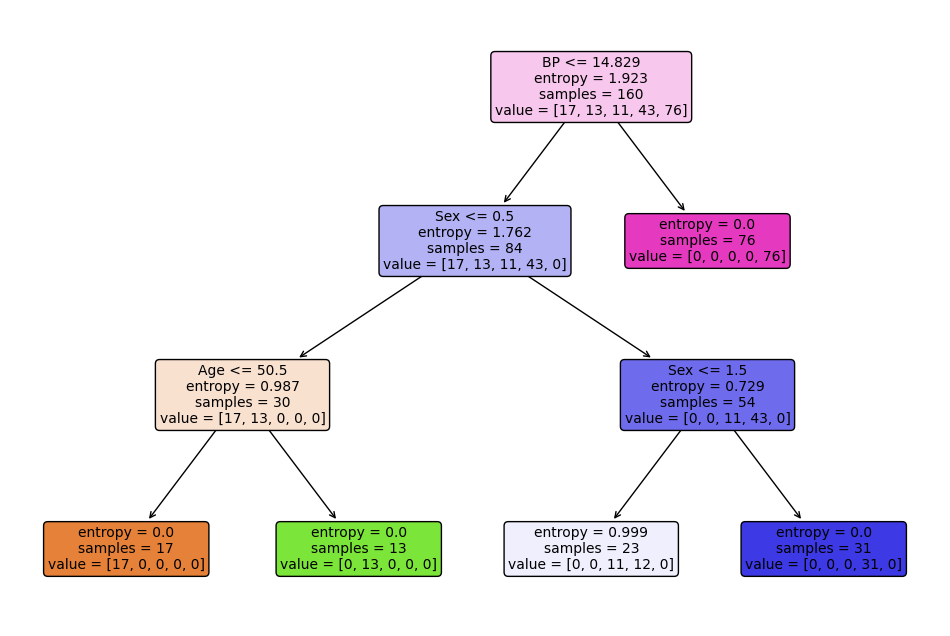

In [31]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf,feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.show()

### ChiSquared

In [32]:
X=df.drop(['Drug'], axis=1) 
y=df['Drug']

In [33]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [34]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [35]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
X['Sex'] = label_encoder.fit_transform(X['Sex'])
X['BP'] = label_encoder.fit_transform(X['BP'])
X['Cholesterol'] = label_encoder.fit_transform(X['Cholesterol'])


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_encoded = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
k=3
best_features = SelectKBest(score_func=chi2, k=k)
X_train_new = best_features.fit_transform(X_train, y_train)
X_test_new = best_features.transform(X_test)

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train_new, y_train)

DecisionTreeClassifier()

In [38]:
y_pred = clf.predict(X_test_new)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy score: {0:0.4f}'.format(accuracy))

Model accuracy score: 0.8750


In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

from sklearn.metrics import classification_report
print("Classification Report\n")
print(classification_report(y_test, y_pred))


Confusion matrix

 [[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  4  1  0]
 [ 0  0  4  7  0]
 [ 0  0  0  0 15]]
Classification Report

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       0.50      0.80      0.62         5
       drugX       0.88      0.64      0.74        11
       drugY       1.00      1.00      1.00        15

    accuracy                           0.88        40
   macro avg       0.88      0.89      0.87        40
weighted avg       0.90      0.88      0.88        40



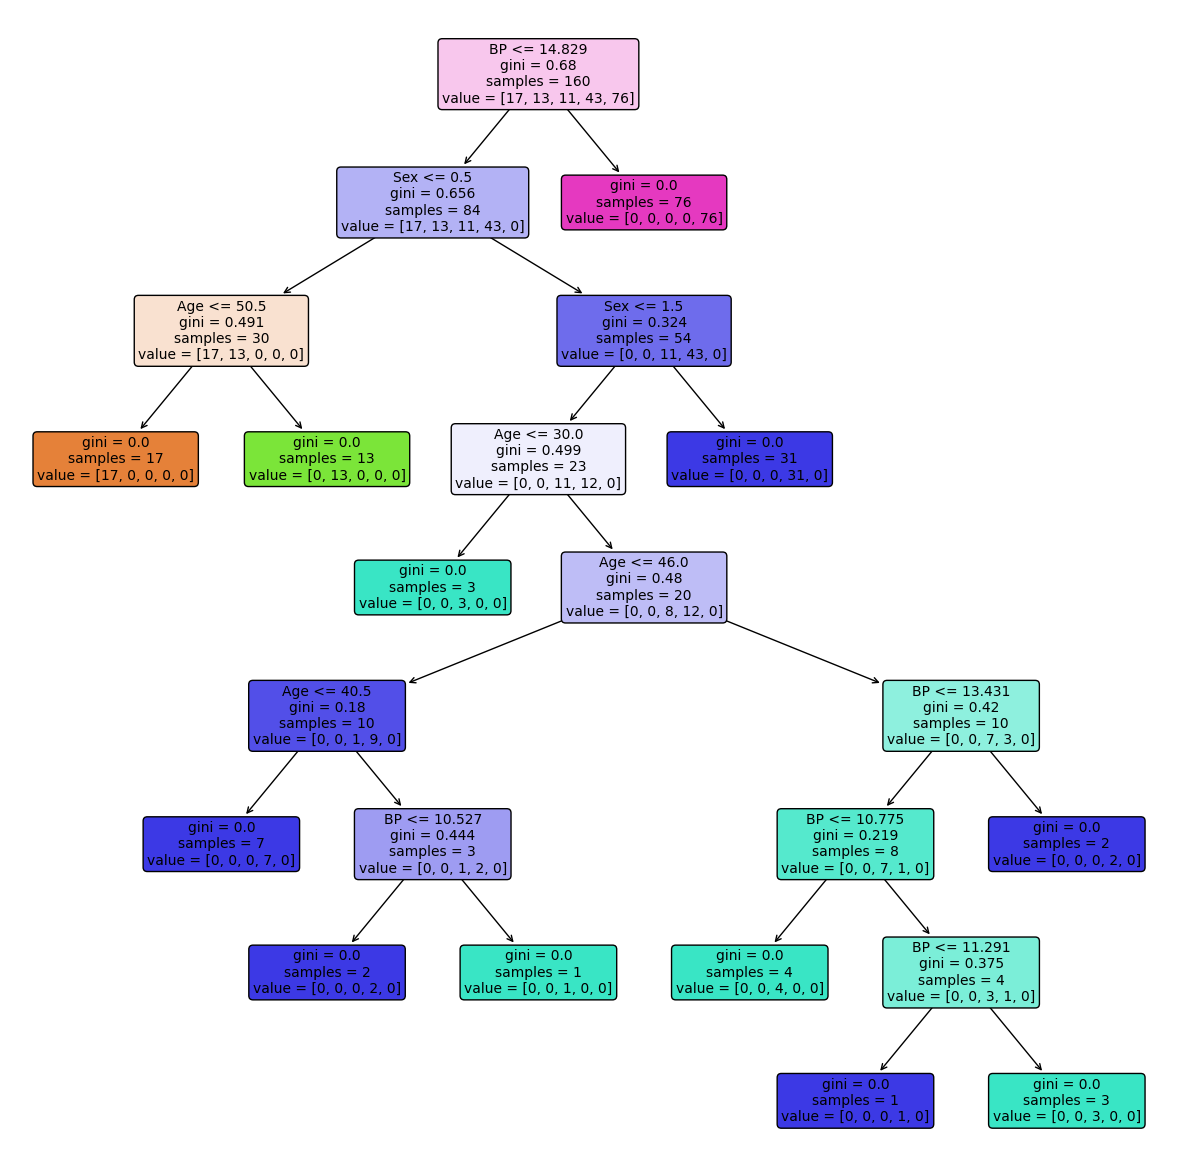

In [40]:
plt.figure(figsize=(15,15))
from sklearn import tree
tree.plot_tree(clf,feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.show()

### CART

In [41]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
X['Sex'] = label_encoder.fit_transform(X['Sex'])
X['BP'] = label_encoder.fit_transform(X['BP'])
X['Cholesterol'] = label_encoder.fit_transform(X['Cholesterol'])


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_encoded = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
X_train.shape, X_test.shape

((140, 5), (60, 5))

In [44]:
X_train.head()

,Age,Sex,BP,Cholesterol,Na_to_K
169,20,0,0,0,11.262
97,56,0,0,0,25.395
31,74,1,0,0,9.567
12,43,1,1,0,15.376
35,46,1,2,1,7.285


In [45]:
X_test.head()

,Age,Sex,BP,Cholesterol,Na_to_K
95,36,1,1,1,11.424
15,16,0,0,1,15.516
30,18,0,2,1,8.750
158,59,0,1,0,10.444
128,47,1,1,1,33.542


In [46]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [47]:
y_pred=clf.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with criterion gini index: 0.9000


In [49]:
y_pred_train = clf.predict(X_train)
y_pred_train

array(['drugA', 'drugY', 'drugB', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugB', 'drugX', 'drugX', 'drugX', 'drugB',
       'drugA', 'drugX', 'drugY', 'drugX', 'drugA', 'drugX', 'drugX',
       'drugY', 'drugA', 'drugA', 'drugA', 'drugB', 'drugB', 'drugA',
       'drugY', 'drugA', 'drugY', 'drugY', 'drugA', 'drugY', 'drugY',
       'drugY', 'drugX', 'drugY', 'drugX', 'drugY', 'drugY', 'drugX',
       'drugB', 'drugX', 'drugY', 'drugA', 'drugX', 'drugY', 'drugX',
       'drugX', 'drugY', 'drugY', 'drugX', 'drugX', 'drugB', 'drugY',
       'drugB', 'drugX', 'drugY', 'drugY', 'drugY', 'drugB', 'drugX',
       'drugA', 'drugY', 'drugY', 'drugY', 'drugA', 'drugX', 'drugX',
       'drugY', 'drugX', 'drugY', 'drugY', 'drugX', 'drugB', 'drugX',
       'drugX', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugB', 'drugX', 'drugX', 'drugA', 'drugY', 'drugA', 'drugA',
       'drugX', 'drugY', 'drugY', 'drugY', 'drugY', 'drugX', 'drugY',
       'drugA', 'dru

In [50]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9286


In [51]:
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Testing set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 0.9286
Testing set score: 0.9000


In [52]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 7  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  0  6  0]
 [ 0  0  0 18  0]
 [ 0  0  0  0 26]]

Classification Report:
               precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         3
       drugC       0.00      0.00      0.00         6
       drugX       0.75      1.00      0.86        18
       drugY       1.00      1.00      1.00        26

    accuracy                           0.90        60
   macro avg       0.75      0.80      0.77        60
weighted avg       0.82      0.90      0.86        60



C:\Users\junio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\junio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\junio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

[Text(0.625, 0.875, 'x[4] <= 14.829\ngini = 0.692\nsamples = 140\nvalue = [16, 13, 10, 36, 65]'),
 Text(0.5, 0.625, 'x[2] <= 0.5\ngini = 0.676\nsamples = 75\nvalue = [16, 13, 10, 36, 0]'),
 Text(0.25, 0.375, 'x[0] <= 50.5\ngini = 0.495\nsamples = 29\nvalue = [16, 13, 0, 0, 0]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 16\nvalue = [16, 0, 0, 0, 0]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 13\nvalue = [0, 13, 0, 0, 0]'),
 Text(0.75, 0.375, 'x[2] <= 1.5\ngini = 0.34\nsamples = 46\nvalue = [0, 0, 10, 36, 0]'),
 Text(0.625, 0.125, 'gini = 0.499\nsamples = 21\nvalue = [0, 0, 10, 11, 0]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 25\nvalue = [0, 0, 0, 25, 0]'),
 Text(0.75, 0.625, 'gini = 0.0\nsamples = 65\nvalue = [0, 0, 0, 0, 65]')]

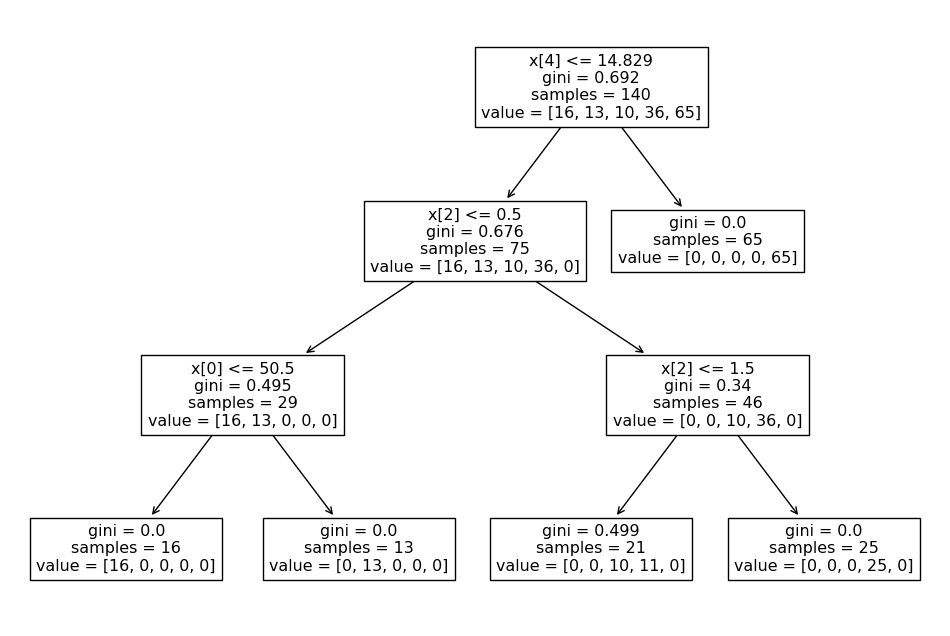

In [53]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf.fit(X_train, y_train))